In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import pandas as pd

import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('Data/2005_age_only.csv')

In [3]:
death_by_age = data['detail_age'].value_counts().sort_index()

Here we simply plot the death count vs the age

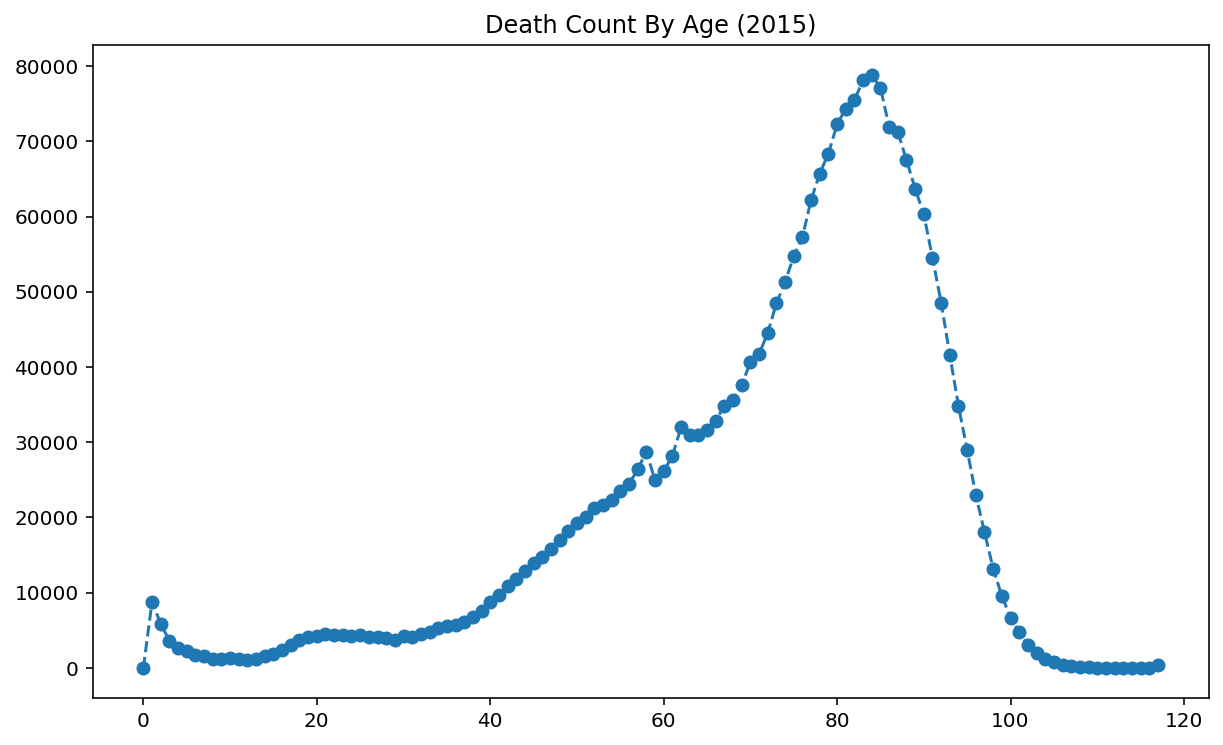

In [4]:
fig = plt.figure(figsize = (10, 6))
plt.plot(death_by_age.values, 'o--')
plt.title('Death Count By Age (2015)')
plt.show()

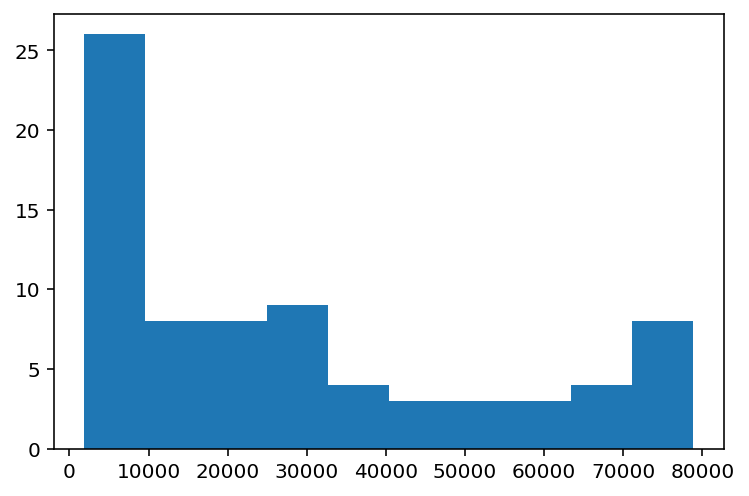

In [5]:
gompertz = death_by_age.loc[15:90]
plt.hist(gompertz);

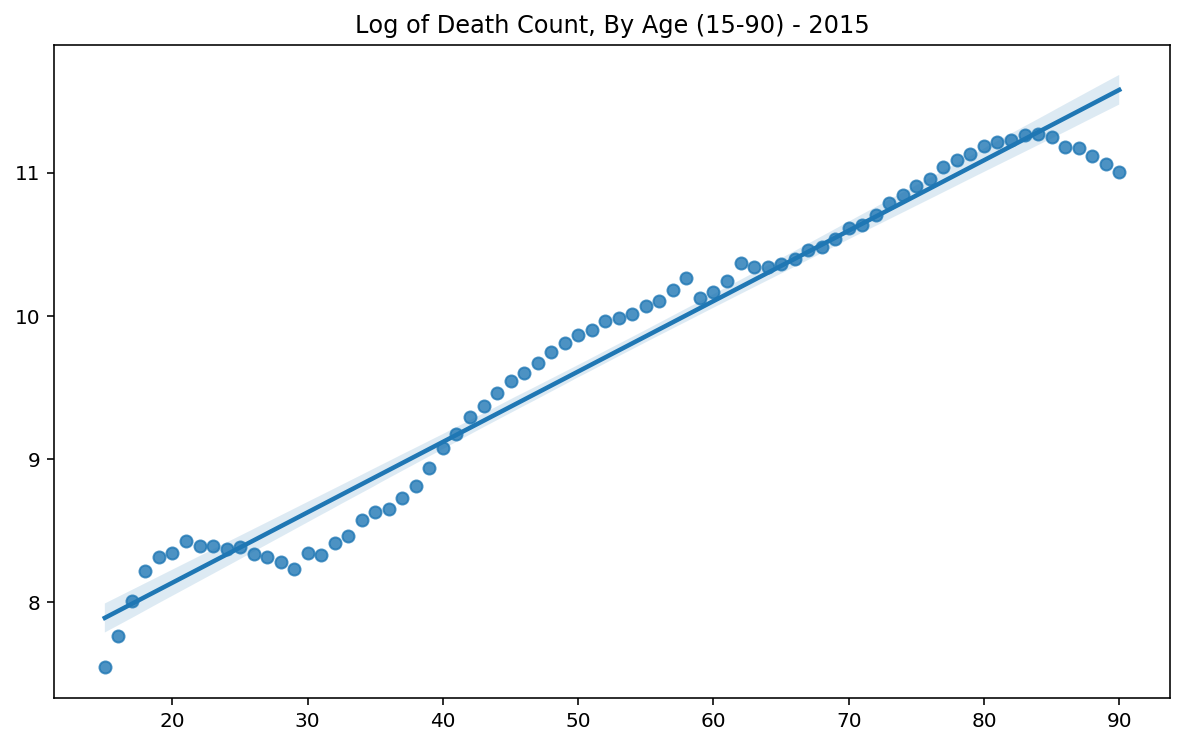

In [5]:
fig = plt.figure(figsize = (10, 6))
plt.title('Log of Death Count, By Age (15-90) - 2015')
gompertz = death_by_age.loc[15:90]
sns.regplot(gompertz.index, np.log(gompertz.values))
plt.show()

This is known as the Gompertzian, named after Benjamin Gompertz.

It is called Gompertzian because it follows Gompertz's model of mortality. Which is

$$\ln(\,\textrm{Death}\,)\ =\ C\ +\ g\,\textrm{Age}$$

where $C$ and $g$ are some number. Meaning that the log of the death rate is linear with respect to age.

Turns out that Covid-19 is also Gompertzian.

https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data

https://www.cdc.gov/nchs/data/databriefs/db355_tables-508.pdf#page=3

https://moshemilevsky.com/wp-content/uploads/2020/05/MILEVSKY_20MAY2020_AMAZON.pdf

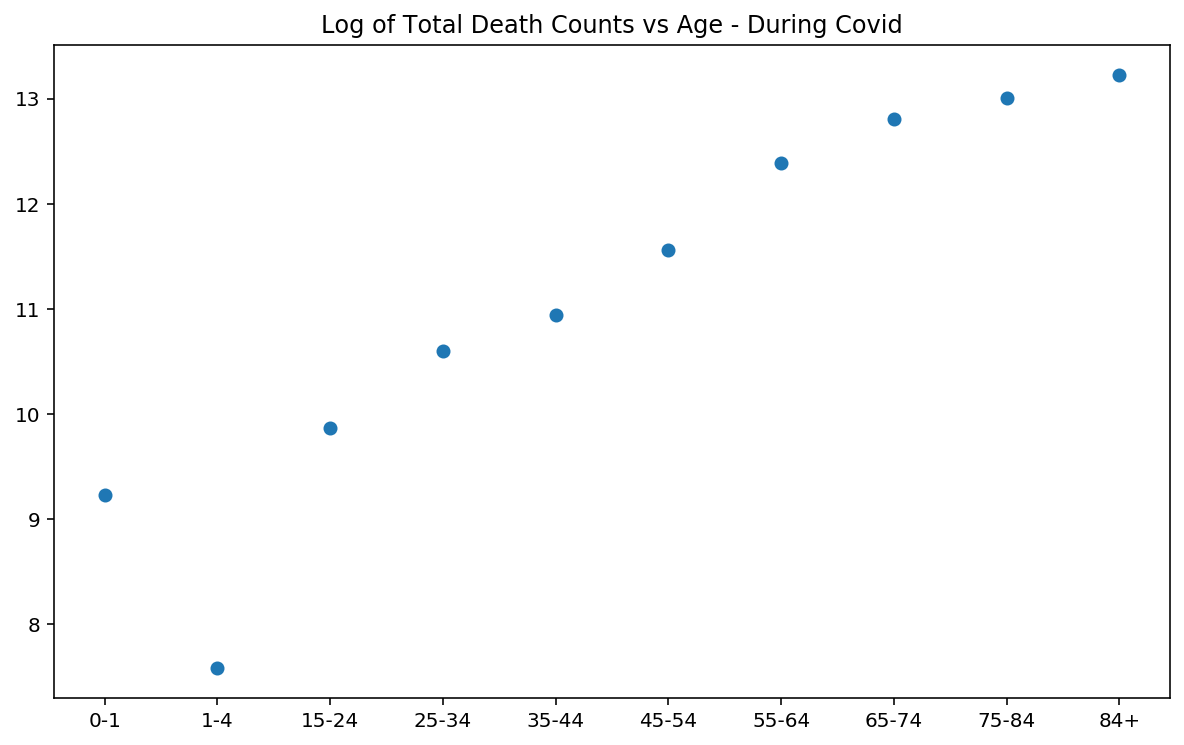

In [6]:
full_covid = [10185, 1967, 19318, 40030, 56730, 104779, 240290, 364438, 445660, 555254]
x_ticks = ['0-1', '1-4', '15-24',  '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '84+']

fig = plt.figure(figsize = (10, 6))
plt.plot(np.log(full_covid), 'o')
plt.xticks(np.arange(0, len(full_covid)), x_ticks)
plt.title('Log of Total Death Counts vs Age - During Covid')
plt.show()

It seems like the first 2 datapoints doesn't follow the Gompertzian law. So we will remove those age brackets from our analysis.

In [7]:
# US Total Death Count During Covid
# From 01-Feb to 29-Aug (6 months)
covid_data = [19318, 40030, 56730, 104779, 240290, 364438, 445660, 555254]

# Pre-Covid 2018 (12 months)
pre_covid_data = [30154, 58844, 80380, 164837, 374836, 543778, 675205, 880280]
pre_covid_data = np.array(pre_covid_data)/2

x_ticks = ['15-24',  '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '84+']

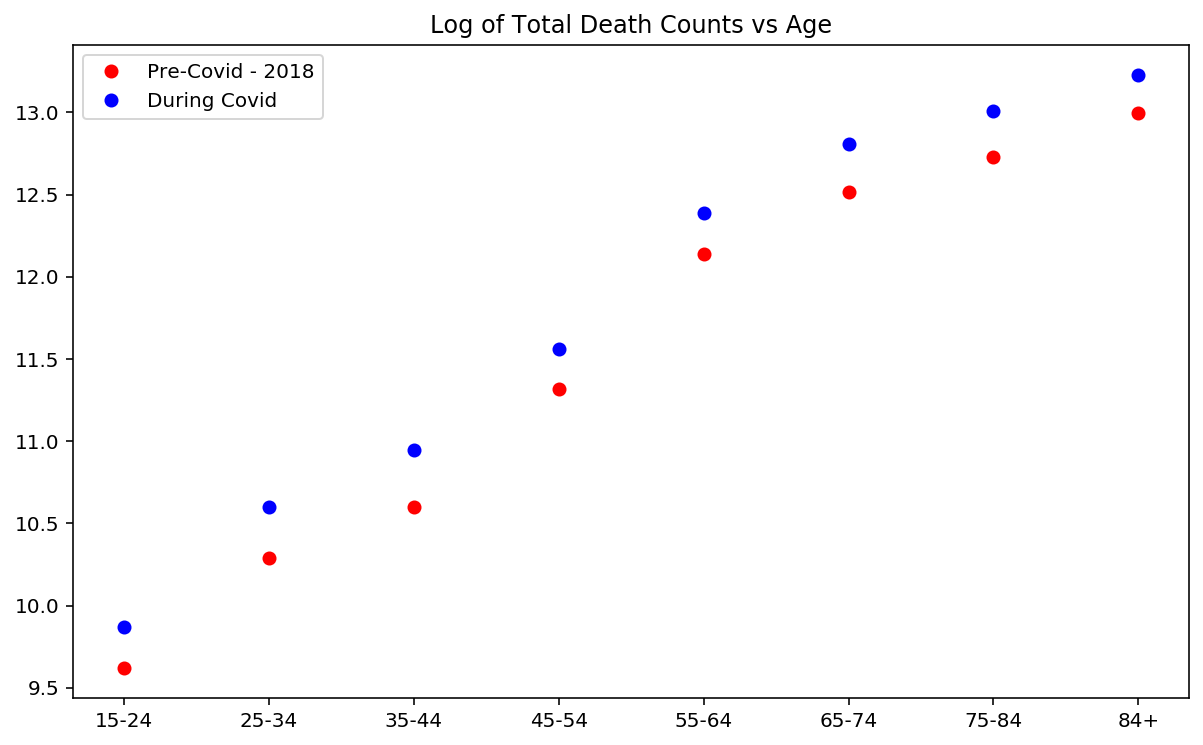

In [8]:
fig = plt.figure(figsize = (10, 6))
plt.plot(np.log(pre_covid_data), 'o', label = 'Pre-Covid - 2018', color = 'red')
plt.plot(np.log(covid_data), 'o', label = 'During Covid', color = 'blue')
plt.xticks(np.arange(0, len(covid_data)), x_ticks)
plt.title('Log of Total Death Counts vs Age')
plt.legend()
plt.show()

In [9]:
X = np.array([[i*10 + 15] for i in range(len(covid_data))])
print(X.T)
covid_ols = LinearRegression().fit(X, np.log(covid_data))
pre_covid_ols = LinearRegression().fit(X, np.log(pre_covid_data))

[[15 25 35 45 55 65 75 85]]


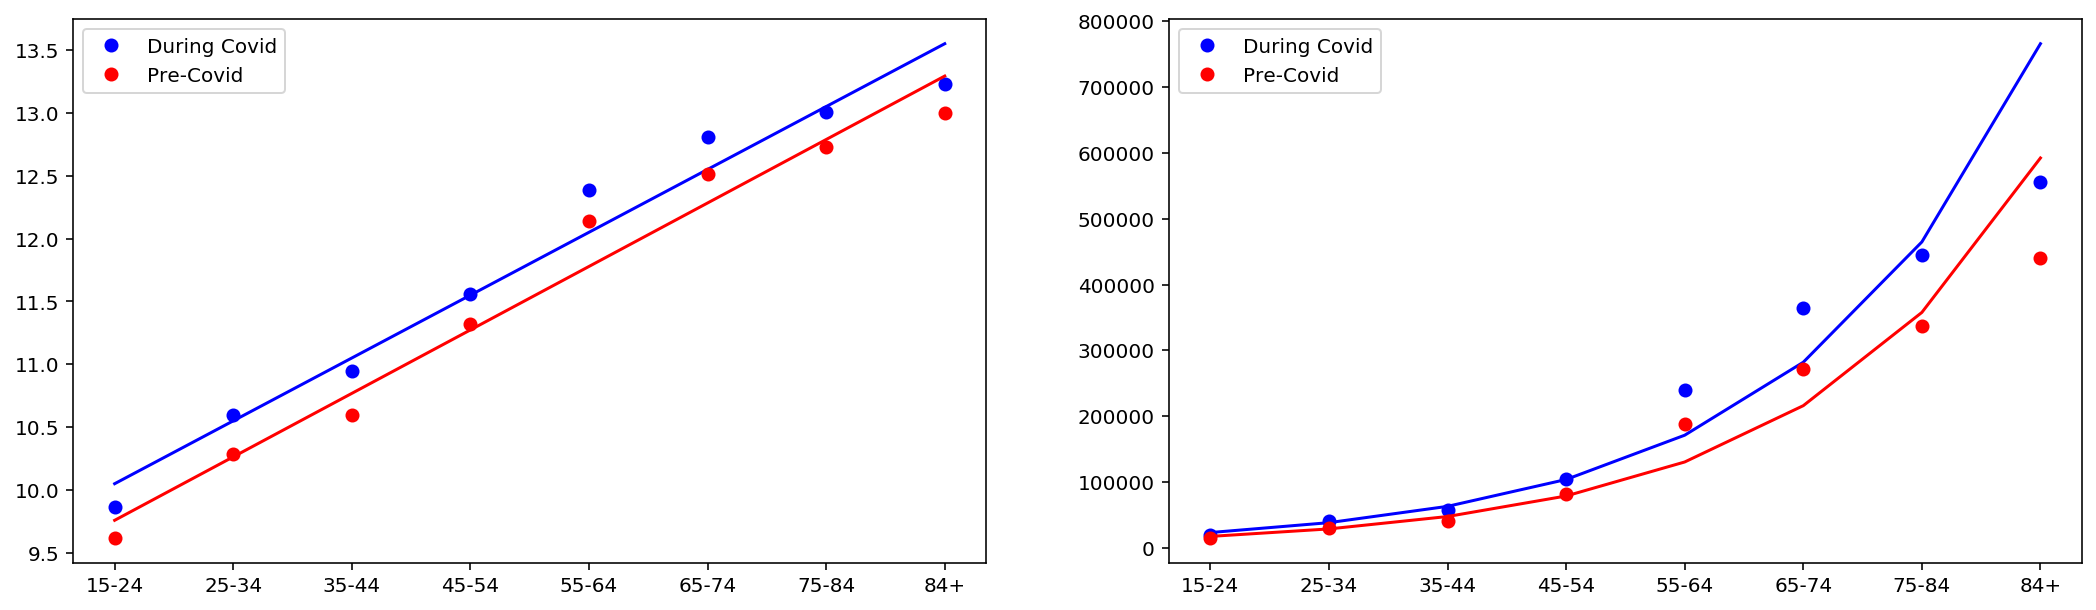

In [10]:
fig = plt.figure(figsize = (18, 5))
plt.subplot(1, 2, 1)
plt.plot(covid_ols.predict(X), color = 'blue')
plt.plot(np.log(covid_data), 'o', color = 'blue', label = 'During Covid')

plt.plot(pre_covid_ols.predict(X), color = 'red')
plt.plot(np.log(pre_covid_data), 'o', color = 'red', label = 'Pre-Covid')

plt.xticks(np.arange(0, len(covid_data)), x_ticks)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.exp(covid_ols.predict(X)), color = 'blue')
plt.plot(covid_data, 'o', color = 'blue', label = 'During Covid')

plt.plot(np.exp(pre_covid_ols.predict(X)), color = 'red')
plt.plot(pre_covid_data, 'o', color = 'red', label = 'Pre-Covid')
plt.legend()
plt.xticks(np.arange(0, len(covid_data)), x_ticks)

plt.show()

In [11]:
print(f'Pre-Covid Line: y = {round(pre_covid_ols.coef_[0], 3)} Age + {round(pre_covid_ols.intercept_, 3)}')
print(f'Covid Line    : y = {round(covid_ols.coef_[0], 3)} Age + {round(covid_ols.intercept_, 3)}')

Pre-Covid Line: y = 0.05 Age + 9.004
Covid Line    : y = 0.05 Age + 9.302


It is very remarkable that these lines are parallel to each other. Because they are, it suggests that covid has a parallel shock. Meaning that everyone's chance of dying has increased. 

But note, increasing out change of dying is the same as saying that we have aged by a certain amount. This is because the older we get the more our chances are to die from BIOLOGOCIAL factors, not accidental factors like car crashes.

So to find out how much Covid has aged us, we need to find the age at which we will have the same death rate before and after covid.

So during covid, when `age = 15`, then the death rate is 

$$y = 0.05\times15 + 9.302=10.052$$

In [12]:
0.05*15 + 9.302

10.052

Hence we need to solve for

$$10.052 = 0.05\, \textrm{Age} + 9.004\implies Age = \frac{10.052 - 9.005}{0.05}$$

In [1]:
(10.052 - 9.005)/0.05

20.939999999999976

In [13]:
age_change = (10.052 - 9.005)/0.05 - 15
print(f'Covid Ages us by: {round(age_change, 3)} Years')

Covid Ages us by: 5.94 Years


Meaning that covid has aged EVERYONE by 5.92 years. Remarkable.

Note that this is not true for all pandemics, or virsus. A simple example would be STD (Sexually Transmitted Diseases). Note that only young people will be a carrier of this disease, as old people won't have that much sex. Hence there 'shock', or increase in mortality, will only increase for young people.

As another example, the Spanish Influenze Pandemic.

https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0069586&type=printable